In [41]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#dataset with Disney movies and total_gross
disney_df = pd.read_csv('https://query.data.world/s/mkfcxqicohry4awyjy22wa6r3qg233?dws=00000')

#Question to solve for: Does the popularity of a Disney movie correlate with the creation of a lego set?

<strong>Disney Movies Dataframe</strong>

In [42]:
disney_df

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


In [43]:
disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].astype(str)

disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].str.replace('$', '').str.replace(',', '')

disney_df['inflation_adjusted_gross'] = disney_df['inflation_adjusted_gross'].astype(int)

In [44]:
disney_df['total_gross'] = disney_df['total_gross'].astype(str)

disney_df['total_gross'] = disney_df['total_gross'].str.replace('$', '').str.replace(',', '')

disney_df['total_gross'] = disney_df['total_gross'].astype(int)


In [45]:
disney_df.sort_values(by='inflation_adjusted_gross', ascending=False, inplace=True)

In [46]:
disney_df.dropna(inplace=True)

In [47]:
disney_df.drop_duplicates(inplace=True)

In [48]:
df_without_duplicates = disney_df.copy()
df_without_duplicates.reset_index(drop=True, inplace=True)

In [49]:
disney_df.genre = disney_df['genre'].apply(lambda x: 'Comedy' if x in ['Romantic Comedy', 'Black Comedy'] else 'Thriller' if x in ['Thriller/Suspense', 'Horror'] else 'Musical' if x in ['Concert/Performance'] else x)

In [50]:
top_50 = disney_df.head(50)

<strong>Setup of Top 50 Grossing Movies & New Column </strong>

In [51]:
top_50['theme_name'] = ['Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™',
                           'Marvel Super Heroes', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™', 
                           'Marvel Super Heroes', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™',
                           'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Marvel Super Heroes', 'Disney™', 'Disney™', 'Disney™',
                           'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™',]

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_2563/2258560670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['theme_name'] = ['Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Disney™', 'Star Wars™', 'Disney™', 'Disney™', 'Disney™',


In [52]:
top_50 = pd.DataFrame(top_50)

disney_df_reordered = ['theme_name', 'movie_title', 'release_date', 'genre', 'MPAA_rating', 'total_gross', 'inflation_adjusted_gross']

top_50 = top_50[disney_df_reordered]

<strong>Top 50, Action & Adventure DataFrames for Disney</strong>

In [53]:
top_50

,theme_name,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Disney™,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,5228953251
1,Disney™,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,2188229052
2,Disney™,Fantasia,"Nov 13, 1940",Musical,G,83320000,2187090808
8,Disney™,101 Dalmatians,"Jan 25, 1961",Comedy,G,153000000,1362870985
6,Disney™,Lady and the Tramp,"Jun 22, 1955",Drama,G,93600000,1236035515
3,Disney™,Song of the South,"Nov 12, 1946",Adventure,G,65000000,1078510579
564,Star Wars™,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225
4,Disney™,Cinderella,"Feb 15, 1950",Drama,G,85000000,920608730
13,Disney™,The Jungle Book,"Oct 18, 1967",Musical,Not Rated,141843000,789612346
179,Disney™,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898


In [54]:
action = top_50[top_50['genre'] == 'Action']

action

,theme_name,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
524,Marvel Super Heroes,The Avengers,"May 4, 2012",Action,PG-13,623279547,660081224
558,Marvel Super Heroes,Avengers: Age of Ultron,"May 1, 2015",Action,PG-13,459005868,459005868
532,Marvel Super Heroes,Iron Man 3,"May 3, 2013",Action,PG-13,408992272,424084233
569,Marvel Super Heroes,Captain America: Civil War,"May 6, 2016",Action,PG-13,408084349,408084349
343,Disney™,Pearl Harbor,"May 25, 2001",Action,PG-13,198539855,295705112


In [55]:
adventure = top_50[top_50['genre'] == 'Adventure']

adventure

,theme_name,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
1,Disney™,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,2188229052
3,Disney™,Song of the South,"Nov 12, 1946",Adventure,G,65000000,1078510579
564,Star Wars™,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225
179,Disney™,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898
441,Disney™,Pirates of the Caribbean: Dead Man’…,"Jul 7, 2006",Adventure,PG-13,423315812,544817142
578,Star Wars™,Rogue One: A Star Wars Story,"Dec 16, 2016",Adventure,PG-13,529483936,529483936
384,Disney™,Finding Nemo,"May 30, 2003",Adventure,G,380529370,518148559
571,Disney™,Finding Dory,"Jun 17, 2016",Adventure,PG,486295561,486295561
499,Disney™,Toy Story 3,"Jun 18, 2010",Adventure,G,415004880,443408255
385,Disney™,Pirates of the Caribbean: The Curse o…,"Jul 9, 2003",Adventure,PG-13,305411224,426967926


<strong>Lego Set DataFrame</strong>

In [56]:
# Local file path to the downloaded CSV file

file_path = '/Users/medirose/Downloads/lego_sets.csv'
# Read the CSV file into a DataFrame

legos_df = pd.read_csv(file_path)

legos_df

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.9900,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.9900,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.9900,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.9900,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.9900,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,7-14,36.5878,6.0,341.0,4.4,Protect NINJAGO® City from flying Manta Ray Bo...,70609.0,Help Cole save Shen-Li in this cool THE LEGO® ...,Easy,Manta Ray Bomber,4.3,THE LEGO® NINJAGO® MOVIE™,4.2,PT
12257,7-14,24.3878,8.0,217.0,4.1,Stop a Piranha Attack with Kai and Misako!,70629.0,Play out an action-packed Piranha Mech pursuit...,Easy,Piranha Attack,3.6,THE LEGO® NINJAGO® MOVIE™,4.1,PT
12258,7-14,24.3878,18.0,233.0,4.6,Stop a crime in the NINJAGO® City street market!,70607.0,"Team up with Lloyd Garmadon, Nya and Officer T...",Easy,NINJAGO® City Chase,4.6,THE LEGO® NINJAGO® MOVIE™,4.5,PT
12259,6-14,12.1878,1.0,48.0,5.0,Achieve Spinjitzu greatness with the Green Ninja!,70628.0,Learn all the skills of Spinjitzu with THE LEG...,Very Easy,Lloyd - Spinjitzu Master,5.0,THE LEGO® NINJAGO® MOVIE™,5.0,PT


In [57]:
legos_df.drop(columns=['num_reviews', 'play_star_rating', 'prod_desc', 'val_star_rating', 'country', 'prod_id', 'star_rating'], inplace=True)

In [58]:
legos_df.review_difficulty = legos_df['review_difficulty'].apply(lambda x: 'Easy' if x in ['Very Easy'] else ('Challenging' if x in ['Very Challenging'] else x))

In [59]:
legos_df['list_price'] = legos_df['list_price'].round(3)

In [60]:
legos_df.dropna(inplace=True)

In [61]:
legos_df.drop_duplicates(inplace=True)

In [62]:
df_without_duplicates = legos_df.copy()
df_without_duplicates.reset_index(drop=True, inplace=True)

In [63]:
legos_df = pd.DataFrame(legos_df)

legos_df_reordered = ['theme_name', 'set_name', 'prod_long_desc', 'list_price', 'piece_count', 'ages', 'review_difficulty']

legos_df = legos_df[legos_df_reordered]

<strong>Creation of Top 50 Lego DataFrame</strong>

In [64]:
legos_df = legos_df[(legos_df['theme_name'].isin(['Disney™', 'Marvel Super Heroes', 'Star Wars™']))]

In [65]:
top_lego = legos_df.head(50)

In [66]:
top_lego.sort_values(by='list_price', ascending=False, inplace=True)

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_2563/2421249652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_lego.sort_values(by='list_price', ascending=False, inplace=True)


In [67]:
top_lego.ages = top_lego['ages'].apply(lambda x: '5-12' if x in ['5-12', '6-12', '7-12', '8-12'] else '7-14' if x in ['7-14', '8-14', '9-14'] else '14+' if x in ['14+', '16+'] else x)

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_2563/543482756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_lego.ages = top_lego['ages'].apply(lambda x: '5-12' if x in ['5-12', '6-12', '7-12', '8-12'] else '7-14' if x in ['7-14', '8-14', '9-14'] else '14+' if x in ['14+', '16+'] else x)


<strong>Top 50 Lego DataFrame</strong>

In [68]:
top_lego

,theme_name,set_name,prod_long_desc,list_price,piece_count,ages,review_difficulty
640,Star Wars™,Death Star™,Reenact amazing scenes from the Star Wars saga...,499.99,4016.0,14+,Challenging
248,Disney™,The Disney Castle,Bring the magical world of Disney to your home...,349.99,4080.0,14+,Challenging
249,Disney™,Silent Mary,Bring the magic of Disney’s Pirates of the Car...,199.99,2294.0,14+,Average
628,Star Wars™,Kessel Run Millennium Falcon™,"Travel with Han Solo, Chewbacca and their frie...",169.99,1413.0,7-14,Average
463,Marvel Super Heroes,The Hulkbuster: Ultron Edition,Build and display this superhero toy—a highly ...,119.99,1363.0,14+,Average
464,Marvel Super Heroes,Sanctum Sanctorum Showdown,Stage a LEGO® Marvel Super Heroes 76108 Sanctu...,99.99,1004.0,7-14,Average
250,Disney™,Elsa's Magical Ice Palace,Build a grand and glittering Ice Palace for El...,79.99,701.0,5-12,Average
629,Star Wars™,Imperial TIE Fighter™,Engage the enemy with the LEGO® Star Wars Impe...,69.99,519.0,7-14,Average
251,Disney™,Cinderella's Dream Castle,LEGO® l Disney Cinderella’s Dream Castle is th...,69.99,585.0,5-12,Challenging
465,Marvel Super Heroes,Thanos: Ultimate Battle,Fly into conflict on an uncharted planet aboar...,69.99,674.0,7-14,Average


<strong>Graphs & Pivot Tables</strong>

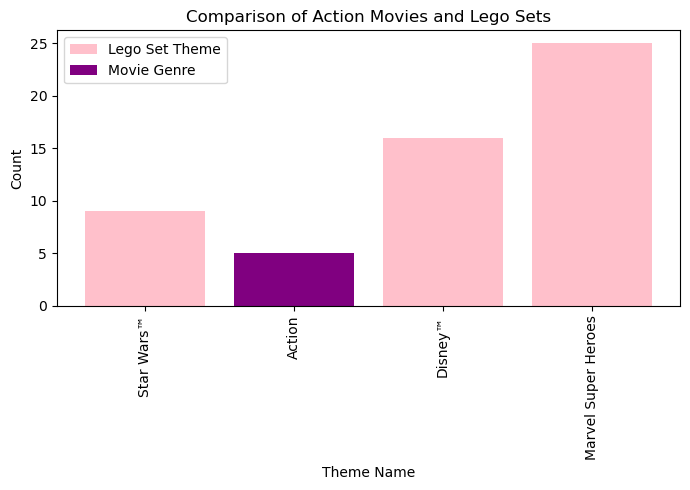

In [69]:
action2_theme_counts = top_lego['theme_name'].value_counts()
action_theme_counts = action['genre'].value_counts()

# Get the union of theme names from both datasets
all_theme_names = set(action2_theme_counts.index) | set(action_theme_counts.index)

# Create arrays to store counts for each theme_name
action2_counts = [action2_theme_counts.get(theme_name, 0) for theme_name in all_theme_names]
action_counts = [action_theme_counts.get(theme_name, 0) for theme_name in all_theme_names]

# Plotting
plt.figure(figsize=(7, 5))

plt.bar(list(all_theme_names), action2_counts, color='pink', label='Lego Set Theme')
plt.bar(list(all_theme_names), action_counts, color='purple', label='Movie Genre')

plt.title('Comparison of Action Movies and Lego Sets')
plt.xlabel('Theme Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/tmp/test.png', bbox_inches='tight')
plt.show()

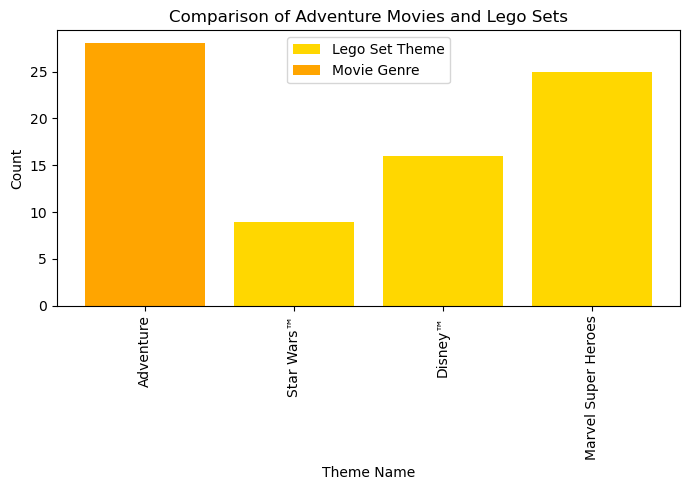

In [70]:
action2_theme_counts = top_lego['theme_name'].value_counts()
action_theme_counts = adventure['genre'].value_counts()

# Get the union of theme names from both datasets
all_theme_names = set(action2_theme_counts.index) | set(action_theme_counts.index)

# Create arrays to store counts for each theme_name
action2_counts = [action2_theme_counts.get(theme_name, 0) for theme_name in all_theme_names]
action_counts = [action_theme_counts.get(theme_name, 0) for theme_name in all_theme_names]

# Plotting
plt.figure(figsize=(7, 5))

plt.bar(list(all_theme_names), action2_counts, color='gold', label='Lego Set Theme')
plt.bar(list(all_theme_names), action_counts, color='orange', label='Movie Genre')

plt.title('Comparison of Adventure Movies and Lego Sets')
plt.xlabel('Theme Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/tmp/test.png', bbox_inches='tight')
plt.show()

In [71]:
pivot_disney = top_50.pivot_table(index='theme_name', columns='genre', values='inflation_adjusted_gross', aggfunc='mean')

pivot_disney

genre,Action,Adventure,Comedy,Drama,Musical,Thriller
theme_name,,,,,,
Disney™,295705112.0,496282002.8,4.461778e+08,1.078322e+09,2.142169e+09,408089581.5
Marvel Super Heroes,487813918.5,343771168.0,NaN,NaN,NaN,NaN
Star Wars™,NaN,733073080.5,NaN,NaN,NaN,NaN


In [72]:
pivot_lego = top_lego.pivot_table(index='theme_name', columns='review_difficulty', values='list_price', aggfunc='mean').round(2)

pivot_lego

review_difficulty,Average,Challenging,Easy
theme_name,,,
Disney™,69.16,148.32,24.28
Marvel Super Heroes,57.77,NaN,22.99
Star Wars™,119.99,499.99,25.82


In [73]:
top_lego.groupby(['theme_name', 'review_difficulty',])['ages'].count()

theme_name           review_difficulty
Disney™              Average               6
                     Challenging           3
                     Easy                  7
Marvel Super Heroes  Average               9
                     Easy                 16
Star Wars™           Average               2
                     Challenging           1
                     Easy                  6
Name: ages, dtype: int64

In [74]:
top_lego.describe(include= 'object')

,theme_name,set_name,prod_long_desc,ages,review_difficulty
count,50,50,50,50,50
unique,3,50,50,4,3
top,Marvel Super Heroes,Death Star™,Reenact amazing scenes from the Star Wars saga...,5-12,Easy
freq,25,1,1,29,29


Text(0.5, 1.0, 'Top 50 Movies by Inflation Adjusted Gross')

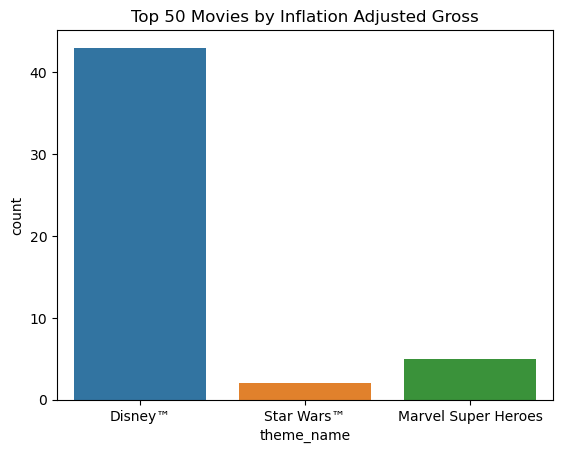

In [75]:
sns.countplot(x='theme_name', data=top_50)
plt.title('Top 50 Movies by Inflation Adjusted Gross')

Text(0.5, 1.0, 'Top 50 Sets by Theme')

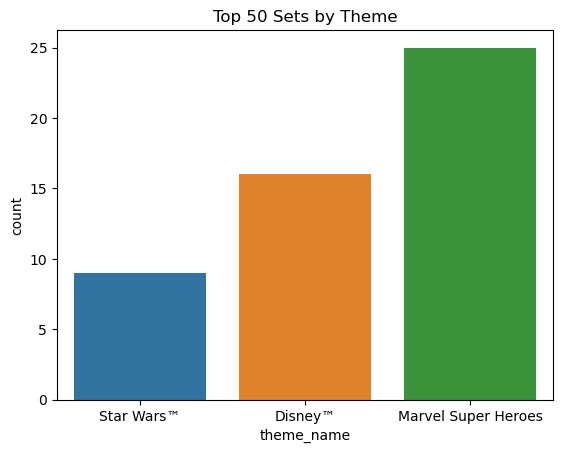

In [76]:
sns.countplot(x='theme_name', data=top_lego)
plt.title('Top 50 Sets by Theme')

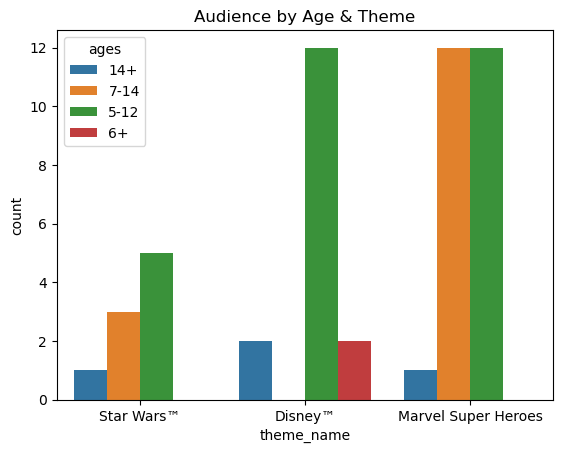

In [77]:
sns.countplot(x='theme_name', hue='ages', data=top_lego)
plt.title('Audience by Age & Theme')
plt.show()

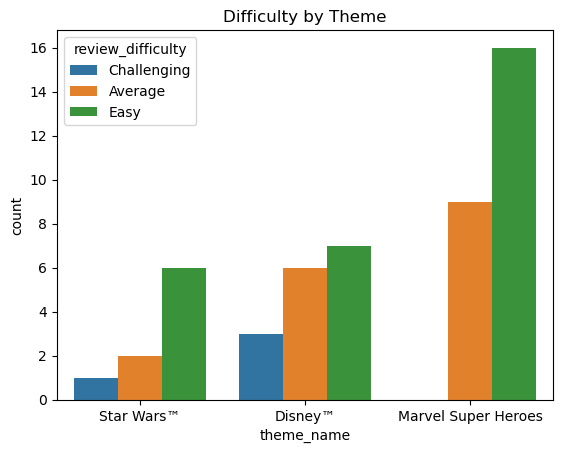

In [78]:
sns.countplot(x='theme_name', hue='review_difficulty', data=top_lego)
plt.title('Difficulty by Theme')
plt.show()

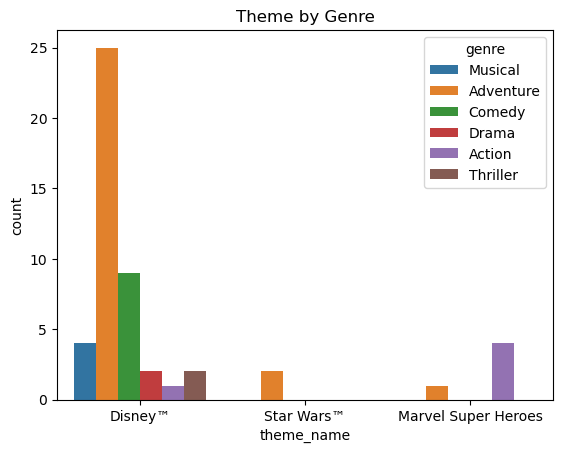

In [79]:
sns.countplot(x='theme_name', hue='genre', data=top_50)
plt.title('Theme by Genre')
plt.show()

<strong>CSV for all Dataframes</strong>

In [80]:
# Save Top 50 DataFrames for both Disney and Lego
top_50.to_csv('top_50_disney_movies.csv', index=False)
top_lego.to_csv('top_50_lego_sets.csv', index=False)

# Save the pivot tables for Disney movies and Lego sets
pivot_disney.to_csv('pivot_disney_movies.csv')
pivot_lego.to_csv('pivot_lego_sets.csv')

# Save the cleaned Disney and Lego DataFrames
disney_df.to_csv('cleaned_disney_movies.csv', index=False)
legos_df.to_csv('cleaned_lego_sets.csv', index=False)

# Save action and adventure genre filtered DataFrames
action.to_csv('action_disney_movies.csv', index=False)
adventure.to_csv('adventure_disney_movies.csv', index=False)